##**Installing the transformers library**



In [2]:
!pip install transformers

##**Importing the tools**

In [3]:
pip install bioinfokit

In [4]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
import re
warnings.filterwarnings('ignore')

##**Importing the dataset from Drive**

In [5]:

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
#Mozilla
df1=pd.read_csv('gdrive/My Drive/cln_copie_dup_total1.csv',delimiter=';')
df2=pd.read_csv('gdrive/My Drive/cln_copie_nndup_total1.csv',delimiter=';')

In [ ]:
#Thunderbird
df1=pd.read_csv('gdrive/My Drive/test_dup_TB.csv',delimiter=';')
df2=pd.read_csv('gdrive/My Drive/test_Nondup_TB.csv',delimiter=';')

In [ ]:
df3=pd.read_csv('gdrive/My Drive/test_ten_ec2.csv',delimiter=';')

In [5]:
#Eclipse
df1=pd.read_csv('gdrive/My Drive/EP_test_dup.csv',delimiter=';')
df2=pd.read_csv('gdrive/My Drive/EP_test_nondup.csv',delimiter=';')

In [7]:
df1['Label'] = 1
df2['Label'] = 0

In [ ]:
df = pd.concat([df1,df2], ignore_index=True)

##**Loading the Pre-trained BERT model**

In [8]:
import time
start = time.time()

model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# **Remove stop words**

In [9]:
df1['Title1']= df1['Title1'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once'  'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')


df1['Title2']= df1['Title2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 
                                         'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

df2['Title1']= df2['Title1'].str.replace(r'i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')


df2['Title2']= df2['Title2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 
                                         'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

df1['Description1']= df1['Description1'].str.replace(r'i' 'me' 'my' 'myself' 'we'  'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 
                                         'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

df1['Description2']= df1['Description2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 
                                         'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

df2['Description1']= df2['Description1'].str.replace(r'i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 
                                         'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

df2['Description2']= df2['Description2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 
                                         'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own'  'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')






#**Batch ThunderBird**

In [ ]:
batch_31=df1[:500]
batch_32=df2[:500]
df3 = pd.concat([batch_31,batch_32], ignore_index=True)
batch_41=df1[500:1000]
batch_42=df2[500:1000]
df4 = pd.concat([batch_41,batch_42], ignore_index=True)
batch_51=df1[1000:1500]
batch_52=df2[1000:1500]
df5 = pd.concat([batch_51,batch_52], ignore_index=True)
batch_61=df1[1500:2000]
batch_62=df2[1500:2000]
df6 = pd.concat([batch_61,batch_62], ignore_index=True)
batch_71=df1[2000:2500]
batch_72=df2[2000:2500]
df7 = pd.concat([batch_71,batch_72], ignore_index=True)
batch_81=df1[2500:3000]
batch_82=df2[2500:3000]
df8 = pd.concat([batch_81,batch_82], ignore_index=True)
batch_91=df1[3000:3486]
batch_92=df2[3000:3486]
df9 = pd.concat([batch_91,batch_92], ignore_index=True)


#Testing
batch_101=df1[3486:3900]
batch_102=df2[3486:3900]
df10 = pd.concat([batch_101,batch_102], ignore_index=True)
batch_111=df1[3900:4338]
batch_112=df2[3900:4374]
df11 = pd.concat([batch_111,batch_112], ignore_index=True)
#df12 = df2[4500:5500]
#df13=df2[5500:6000]
#df14=df2[6000:6500]
#df15=df2[6500:7000]
#df16=df2[7000:7500]
#df17=df2[7500:8000]
#df18=df2[8000:8500]
#df19=df2[8500:9000]
#df20=df2[9000:9500]
#df21=df2[9500:]

In [ ]:
batch_121=df1[4500:]
batch_122=df2[4500:5500]
df12 = pd.concat([batch_121,batch_122], ignore_index=True)

#**Batch EP**

In [9]:
#training
batch_31=df1[:500]
batch_32=df2[:500]
df3 = pd.concat([batch_31,batch_32], ignore_index=True)
batch_41=df1[500:1000]
batch_42=df2[500:1000]
df4 = pd.concat([batch_41,batch_42], ignore_index=True)
batch_51=df1[1000:1500]
batch_52=df2[1000:1500]
df5 = pd.concat([batch_51,batch_52], ignore_index=True)
batch_61=df1[1500:2000]
batch_62=df2[1500:2000]
df6 = pd.concat([batch_61,batch_62], ignore_index=True)
batch_71=df1[2000:2500]
batch_72=df2[2000:2500]
df7 = pd.concat([batch_71,batch_72], ignore_index=True)
batch_81=df1[2500:3000]
batch_82=df2[2500:3000]
df8 = pd.concat([batch_81,batch_82], ignore_index=True)
batch_91=df1[3000:3500]
batch_92=df2[3000:3500]
df9 = pd.concat([batch_91,batch_92], ignore_index=True)
batch_101=df1[3500:4000]
batch_102=df2[3500:4000]
df10 = pd.concat([batch_101,batch_102], ignore_index=True)
batch_111=df1[4000:4500]
batch_112=df2[4000:4500]
df11 = pd.concat([batch_111,batch_112], ignore_index=True)
batch_121=df1[4500:5000]
batch_122=df2[4500:5000]
df12 = pd.concat([batch_121,batch_122], ignore_index=True)
batch_131=df1[5000:5250]
batch_132=df2[5000:5250]
df13 = pd.concat([batch_131,batch_132], ignore_index=True)
batch_141=df1[5250:5500]
batch_142=df2[5250:5500]
df14 = pd.concat([batch_141,batch_142], ignore_index=True)
batch_151=df1[5500:5750]
batch_152=df2[5500:5750]
df15 = pd.concat([batch_151,batch_152], ignore_index=True)
batch_161=df1[5750:6000]
batch_162=df2[5750:6000]
df16 = pd.concat([batch_161,batch_162], ignore_index=True)
batch_171=df1[6000:6250]
batch_172=df2[6000:6250]
df17 = pd.concat([batch_171,batch_172], ignore_index=True)
batch_181=df1[6250:6500]
batch_182=df2[6250:6500]
df18 = pd.concat([batch_181,batch_182], ignore_index=True)
batch_191=df1[6500:6750]
batch_192=df2[6500:6750]
df19 = pd.concat([batch_191,batch_192], ignore_index=True)
batch_201=df1[6750:7000]
batch_202=df2[6750:7000]
df20 = pd.concat([batch_201,batch_202], ignore_index=True)
batch_211=df1[7000:7250]
batch_212=df2[7000:7250]
df21 = pd.concat([batch_211,batch_212], ignore_index=True)
batch_221=df1[7250:7400]
batch_222=df2[7250:7400]
df22 = pd.concat([batch_221,batch_222], ignore_index=True)


#testing : df1: D: 8103 / df2: Non: 10397
batch_231=df1[7400:7750]
batch_232=df2[7400:7750]
df23 = pd.concat([batch_231,batch_232], ignore_index=True)
batch_241=df1[7750:8000]
batch_242=df2[7750:8000]
df24 = pd.concat([batch_241,batch_242], ignore_index=True)
batch_251=df1[8000:8103]
batch_252=df2[8000:8250]
df25 = pd.concat([batch_251,batch_252], ignore_index=True)
#batch_261=df[8250:8500]
batch_262=df2[8250:8500]
df26=batch_262
#df26 = pd.concat([batch_261,batch_262], ignore_index=True)
#batch_271=df1[8500:8750]
batch_272=df2[8500:9000]
df27= batch_272
#df27 = pd.concat([batch_271,batch_272], ignore_index=True)
#batch_281=df1[8750:9000]
#batch_282=df2[8750:9000]
#df28= batch_282
#df28 = pd.concat([batch_281,batch_282], ignore_index=True)
#batch_291=df1[9000:9500]
batch_292=df2[9000:9500]
df29= batch_292
#df29 = pd.concat([batch_291,batch_292], ignore_index=True)
#batch_301=df1[9250:9500]
batch_302=df2[9500:9900]
df30 = batch_302
#df30 = pd.concat([batch_301,batch_302], ignore_index=True)
#batch_311=df1[9500:9750]
batch_312=df2[9900:10397]
df31= batch_312
#df31 = pd.concat([batch_311,batch_312], ignore_index=True)
#atch_321=df1[9750:10000]
#batch_322=df2[9750:10000]
#df32 = pd.concat([batch_321,batch_322], ignore_index=True)

#**Mozilla**

In [11]:
#training
batch_31=df1[:500]
batch_32=df2[:500]
df3 = pd.concat([batch_31,batch_32], ignore_index=True)
batch_41=df1[500:1000]
batch_42=df2[500:1000]
df4 = pd.concat([batch_41,batch_42], ignore_index=True)
batch_51=df1[1000:1500]
batch_52=df2[1000:1500]
df5 = pd.concat([batch_51,batch_52], ignore_index=True)
batch_61=df1[1500:2000]
batch_62=df2[1500:2000]
df6 = pd.concat([batch_61,batch_62], ignore_index=True)
batch_71=df1[2000:2500]
batch_72=df2[2000:2500]
df7 = pd.concat([batch_71,batch_72], ignore_index=True)
batch_81=df1[2500:3000]
batch_82=df2[2500:3000]
df8 = pd.concat([batch_81,batch_82], ignore_index=True)
batch_91=df1[3000:3500]
batch_92=df2[3000:3500]
df9 = pd.concat([batch_91,batch_92], ignore_index=True)
batch_101=df1[3500:4000]
batch_102=df2[3500:4000]
df10 = pd.concat([batch_101,batch_102], ignore_index=True)
batch_111=df1[4000:4500]
batch_112=df2[4000:4500]
df11 = pd.concat([batch_111,batch_112], ignore_index=True)
batch_121=df1[4500:5000]
batch_122=df2[4500:5000]
df12 = pd.concat([batch_121,batch_122], ignore_index=True)
batch_131=df1[5000:5250]
batch_132=df2[5000:5250]
df13 = pd.concat([batch_131,batch_132], ignore_index=True)
batch_141=df1[5250:5500]
batch_142=df2[5250:5500]
df14 = pd.concat([batch_141,batch_142], ignore_index=True)
batch_151=df1[5500:5750]
batch_152=df2[5500:5750]
df15 = pd.concat([batch_151,batch_152], ignore_index=True)
batch_161=df1[5750:6000]
batch_162=df2[5750:6000]
df16 = pd.concat([batch_161,batch_162], ignore_index=True)
batch_171=df1[6000:6250]
batch_172=df2[6000:6250]
df17 = pd.concat([batch_171,batch_172], ignore_index=True)
batch_181=df1[6250:6500]
batch_182=df2[6250:6500]
df18 = pd.concat([batch_181,batch_182], ignore_index=True)
batch_191=df1[6500:6750]
batch_192=df2[6500:6750]
df19 = pd.concat([batch_191,batch_192], ignore_index=True)
batch_201=df1[6750:7000]
batch_202=df2[6750:7000]
df20 = pd.concat([batch_201,batch_202], ignore_index=True)
batch_211=df1[7000:7250]
batch_212=df2[7000:7250]
df21 = pd.concat([batch_211,batch_212], ignore_index=True)
batch_221=df1[7250:7400]
batch_222=df2[7250:7400]
df22 = pd.concat([batch_221,batch_222], ignore_index=True)



batch_231=df1[7400:7600]
batch_232=df2[7400:7600]
df23 = pd.concat([batch_231,batch_232], ignore_index=True)

#testing : df1: D: 9044 / df2: Non: 9956
batch_241=df1[7600:7900]
batch_242=df2[7600:7900]
df24 = pd.concat([batch_241,batch_242], ignore_index=True)
batch_251=df1[7900:8250]
batch_252=df2[7900:8250]
df25 = pd.concat([batch_251,batch_252], ignore_index=True)
batch_261=df1[8250:8500]
batch_262=df2[8250:8500]
#df26=batch_262
df26 = pd.concat([batch_261,batch_262], ignore_index=True)
batch_271=df1[8500:8750]
batch_272=df2[8500:8750]
#df27= batch_272
df27 = pd.concat([batch_271,batch_272], ignore_index=True)
batch_281=df1[8750:9044]
batch_282=df2[8750:9000]
#df28= batch_282
df28 = pd.concat([batch_281,batch_282], ignore_index=True)
#batch_291=df1[9000:9500]
batch_292=df2[9000:9500]
df29= batch_292
#df29 = pd.concat([batch_291,batch_292], ignore_index=True)
#batch_301=df1[9250:9500]
batch_302=df2[9500:9956]
df30 = batch_302
#df30 = pd.concat([batch_301,batch_302], ignore_index=True)
#batch_311=df1[9500:9750]
#batch_312=df2[9900:10103]
#df31= batch_312
#df31 = pd.concat([batch_311,batch_312], ignore_index=True)
#atch_321=df1[9750:10000]
#batch_322=df2[9750:10000]
#df32 = pd.concat([batch_321,batch_322], ignore_index=True)

#**Batch CrossProject**

### **_get_segments3**

In [12]:
def _get_segments3(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    first_sep = False
    current_segment_id = 0 
    for token in tokens:
        segments.append(current_segment_id)
        #print(token)
        if token == 102:
            #if first_sep:
                #first_sep = False 
            #else:
           current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

#**df3**

In [13]:
pair3_1= df3['Title1'] + df3['Description1']
tokenized3_1 = pair3_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair3_2=  df3['Title2'] + df3['Description2'] + [" [SEP] "]
tokenized3_2 = pair3_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized3 = tokenized3_1 + tokenized3_2 

max_len3 = 0                 # padding all lists to the same size
for i in tokenized3.values:
    if len(i) > max_len3:
        max_len3 = len(i)
max_len3 =300
padded3 = np.array([i + [0]*(max_len3-len(i)) for i in tokenized3.values])

np.array(padded3).shape 

attention_mask3 = np.where(padded3 != 0, 1, 0)
attention_mask3.shape
input_ids3 = torch.tensor(padded3)  
attention_mask3 = torch.tensor(attention_mask3)
input_segments3= np.array([_get_segments3(token, max_len3)for token in tokenized3.values])
token_type_ids3 = torch.tensor(input_segments3)
input_segments3 = torch.tensor(input_segments3)

In [14]:
with torch.no_grad():
    last_hidden_states3 = model(input_ids3, attention_mask=attention_mask3, token_type_ids=input_segments3)    # <<< 600 rows only !!!
features3 = last_hidden_states3[0][:,0,:].numpy()
features3    

array([[-1.1917540e+00, -2.7251735e-01, -3.0222225e-01, ...,
        -8.3550316e-01,  2.5618803e-02,  6.2426007e-01],
       [-1.1158620e+00, -3.1189933e-01, -5.9667796e-01, ...,
        -1.1258570e+00, -1.4045573e-03,  6.0073900e-01],
       [-1.4388194e+00, -3.8521490e-01, -3.6954167e-01, ...,
        -8.8833499e-01, -1.4637592e-01,  3.8774931e-01],
       ...,
       [-8.1014574e-01, -3.0788603e-01, -1.5076555e-01, ...,
        -6.1479270e-01,  5.5893880e-01,  5.5536240e-01],
       [-5.0958288e-01, -4.3499950e-01,  6.0237968e-01, ...,
        -1.1628953e+00,  4.7574383e-01,  7.3822087e-01],
       [-7.5887567e-01, -2.3363902e-01, -1.7179585e-01, ...,
        -9.7637200e-01,  2.3601519e-01,  6.3248944e-01]], dtype=float32)

In [ ]:
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50,n_components=2, verbose=1)
#features= m.fit_transform(df_numeric)

tsne_em = m.fit_transform(features3) 


from bioinfokit.visuz import cluster
#cluster.tsneplot(score=tsne_em)
cluster.tsneplot(score=tsne_em)
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()

In [ ]:
color_class = df3['Label'].to_numpy()
#color_class= '1', '0'
cluster.tsneplot(score=tsne_em, colorlist=color_class,colordot=( '#b0413e',  '#736ced'), 
    legendpos='upper right', legendanchor=(1.15, 1) )

#**df4**

In [15]:
pair4_1= df4['Title1'] + df4['Description1']
tokenized4_1 = pair4_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair4_2=  df4['Title2'] + df4['Description2'] + [" [SEP] "]
tokenized4_2 = pair4_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized4 = tokenized4_1 + tokenized4_2 


#tokenized4= np.array(tokenized4)
max_len4 = 0                 # padding all lists to the same size
for i in tokenized4.values:
    if len(i) > max_len4:
        max_len4 = len(i)
max_len4 =300
padded4 = np.array([i + [0]*(max_len4-len(i)) for i in tokenized4.values])
#padded4= torch.from_numpy(padded4)
#np.array(padded4).shape

attention_mask4 = np.where(padded4 != 0, 1, 0)
attention_mask4.shape
input_ids4 = torch.tensor(padded4)  
attention_mask4 = torch.tensor(attention_mask4)
input_segments4= np.array([_get_segments3(token, max_len4)for token in tokenized4.values])
token_type_ids4 = torch.tensor(input_segments4)
input_segments4 = torch.tensor(input_segments4)

with torch.no_grad():
    last_hidden_states4 = model(input_ids4, attention_mask=attention_mask4, token_type_ids=input_segments4)   
features4 = last_hidden_states4[0][:,0,:].numpy()
features4  

array([[-1.0074065 ,  0.00903689, -0.16027234, ..., -0.9727307 ,
         0.17978334,  0.58984923],
       [-0.5074217 , -0.5942143 ,  0.1708871 , ..., -0.61933416,
        -0.06042692,  0.58103824],
       [-0.9273993 , -0.39810988, -0.29337618, ..., -0.89548934,
         0.33331445,  0.30819273],
       ...,
       [-0.57721615,  0.4543554 , -0.49093696, ..., -1.083432  ,
         0.647508  ,  0.3420691 ],
       [-0.48825482, -0.12333166,  0.0897423 , ..., -1.0772939 ,
         0.3861007 ,  0.44875968],
       [-0.57685316, -0.21282074,  0.20056196, ..., -0.8152186 ,
        -0.43966672,  0.40351158]], dtype=float32)

#**df5**

In [16]:
pair5_1= df5['Title1'] + df5['Description1']
tokenized5_1 = pair5_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair5_2=  df5['Title2'] + df5['Description2'] + [" [SEP] "]
tokenized5_2 = pair5_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized5 = tokenized5_1 + tokenized5_2 


##**Padding**

In [17]:
max_len5 = 0                 # padding all lists to the same size
for i in tokenized5.values:
    if len(i) > max_len5:
        max_len5 = len(i)

In [18]:
max_len5 =300
padded5 = np.array([i + [0]*(max_len5-len(i)) for i in tokenized5.values])

np.array(padded5).shape        # Dimensions of the padded variable

(1000, 300)

##**Masking**

In [19]:
attention_mask5 = np.where(padded5 != 0, 1, 0)
attention_mask5.shape
input_ids5 = torch.tensor(padded5)  
attention_mask5 = torch.tensor(attention_mask5)

##**Running the `model()` function through BERT**

In [20]:
input_segments5= np.array([_get_segments3(token, max_len5)for token in tokenized5.values])
token_type_ids5 = torch.tensor(input_segments5)
input_segments5 = torch.tensor(input_segments5)

In [21]:
with torch.no_grad():
    last_hidden_states5 = model(input_ids5, attention_mask=attention_mask5, token_type_ids=input_segments5)    # <<< 600 rows only !!!

##**Slicing the part of the output of BERT : [cls]**

In [22]:
features5 = last_hidden_states5[0][:,0,:].numpy()
features5

array([[-0.7150868 , -0.02143804, -0.53712595, ..., -0.96465296,
         0.49361002,  0.5210915 ],
       [-0.4751579 , -0.12975042, -0.21995719, ..., -0.7899966 ,
         0.5517666 ,  0.43111968],
       [-0.54855496,  0.00473771, -0.50283426, ..., -1.0070364 ,
         0.6967882 ,  0.66924685],
       ...,
       [-0.43534502, -0.23190856, -0.07703763, ..., -0.85549664,
         0.12206236,  0.3770517 ],
       [-0.63622326, -0.28681666,  0.4257244 , ..., -0.42866865,
         0.09889748,  0.3313467 ],
       [-0.336238  , -0.7268026 ,  0.15072565, ..., -0.7417214 ,
        -0.26674798,  0.42967662]], dtype=float32)

#**df6**

In [23]:
pair6_1= df6['Title1'] + df6['Description1']
tokenized6_1 = pair6_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair6_2=  df6['Title2'] + df6['Description2'] + [" [SEP] "]
tokenized6_2 = pair6_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized6 = tokenized6_1 + tokenized6_2 

max_len6 = 0                 # padding all lists to the same size
for i in tokenized6.values:
    if len(i) > max_len6:
        max_len6 = len(i)

max_len6=300
padded6 = np.array([i + [0]*(max_len6-len(i)) for i in tokenized6.values])

np.array(padded6).shape        # Dimensions of the padded variable        

attention_mask6 = np.where(padded6 != 0, 1, 0)
attention_mask6.shape
input_ids6 = torch.tensor(padded6)  
attention_mask6 = torch.tensor(attention_mask6)
input_segments6= np.array([_get_segments3(token, max_len6)for token in tokenized6.values])
token_type_ids6 = torch.tensor(input_segments6)
input_segments6 = torch.tensor(input_segments6)

In [24]:
with torch.no_grad():
    last_hidden_states6 = model(input_ids6, attention_mask=attention_mask6, token_type_ids=input_segments6)   
features6 = last_hidden_states6[0][:,0,:].numpy()
features6    

array([[-0.70732516, -0.5288594 , -0.24584115, ..., -0.8108048 ,
         0.17355457,  0.7004055 ],
       [-0.6506675 , -0.6261653 , -0.27850452, ..., -0.79061395,
         0.02959961,  0.4444836 ],
       [-0.8070857 , -0.5031243 , -0.38067722, ..., -0.8365173 ,
         0.12972401,  0.4878298 ],
       ...,
       [-0.46825522, -0.02428632, -0.3221991 , ..., -0.66942424,
         0.6531059 ,  0.4078506 ],
       [-0.86163706, -0.71258837, -0.30841464, ..., -0.67918557,
        -0.5018392 ,  0.47072276],
       [-0.9294154 , -0.7963693 , -0.19163138, ..., -0.70108855,
         0.11923506,  0.8842914 ]], dtype=float32)

#**df7**

In [25]:
pair7_1= df7['Title1'] + df7['Description1']
tokenized7_1 = pair7_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair7_2=  df7['Title2'] + df7['Description2'] + [" [SEP] "]
tokenized7_2 = pair7_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized7 = tokenized7_1 + tokenized7_2 

max_len7 = 0                 # padding all lists to the same size
for i in tokenized7.values:
    if len(i) > max_len7:
        max_len7 = len(i)

max_len7=300
padded7 = np.array([i + [0]*(max_len7-len(i)) for i in tokenized7.values])

np.array(padded7).shape        # Dimensions of the padded variable    

attention_mask7 = np.where(padded7 != 0, 1, 0)
attention_mask7.shape
input_ids7 = torch.tensor(padded7)  
attention_mask7 = torch.tensor(attention_mask7)
input_segments7= np.array([_get_segments3(token, max_len7)for token in tokenized7.values])
token_type_ids7 = torch.tensor(input_segments7)
input_segments7 = torch.tensor(input_segments7)

with torch.no_grad():
    last_hidden_states7 = model(input_ids7, attention_mask=attention_mask7, token_type_ids=input_segments7)  
features7 = last_hidden_states7[0][:,0,:].numpy()
features7  

array([[-1.0016961 , -0.1429964 , -0.43225417, ..., -0.89050096,
         0.26834354,  0.3012184 ],
       [-1.2596343 , -0.21117105, -0.869571  , ..., -0.9034431 ,
         0.34412763,  0.19730861],
       [-0.9392237 , -0.2350783 , -0.7561936 , ..., -0.9042811 ,
         0.26033762,  0.3057428 ],
       ...,
       [-0.43330994,  0.03957942,  0.3698622 , ..., -0.7907169 ,
         0.31549135,  0.47611699],
       [-0.49524376,  0.28503007, -0.43448916, ..., -0.6576232 ,
         0.44116557,  0.6529278 ],
       [-0.23445708, -0.28388354,  0.18275483, ..., -0.6729698 ,
         0.23269467,  0.5694868 ]], dtype=float32)

#**df8**

In [26]:
pair8_1= df8['Title1'] + df8['Description1']
tokenized8_1 = pair8_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair8_2=  df8['Title2'] + df8['Description2'] + [" [SEP] "]
tokenized8_2 = pair8_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized8 = tokenized8_1 + tokenized8_2 

max_len8 = 0                 # padding all lists to the same size
for i in tokenized8.values:
    if len(i) > max_len8:
        max_len8 = len(i)
max_len8=300
padded8 = np.array([i + [0]*(max_len8-len(i)) for i in tokenized8.values])

np.array(padded8).shape        # Dimensions of the padded variable  


attention_mask8 = np.where(padded8 != 0, 1, 0)
attention_mask8.shape
input_ids8 = torch.tensor(padded8)  
attention_mask8 = torch.tensor(attention_mask8)
input_segments8= np.array([_get_segments3(token, max_len8)for token in tokenized8.values])
token_type_ids8 = torch.tensor(input_segments8)
input_segments8 = torch.tensor(input_segments8)

with torch.no_grad():
    last_hidden_states8 = model(input_ids8, attention_mask=attention_mask8, token_type_ids=input_segments8)   
features8 = last_hidden_states8[0][:,0,:].numpy()
features8 

array([[-0.57219756, -0.19104268, -0.29295504, ..., -0.9924922 ,
         0.35121664,  0.673953  ],
       [-0.6965745 , -0.17319888, -0.28782362, ..., -1.0402663 ,
         0.4613169 ,  0.61206377],
       [-0.63936394, -0.28378955, -0.17343408, ..., -0.8304699 ,
         0.3297921 ,  0.7071261 ],
       ...,
       [-0.85080385,  0.2128815 , -0.20193015, ..., -0.8751407 ,
         0.19648312,  0.26859182],
       [-0.72485876,  0.0556468 ,  0.19721866, ..., -0.6981154 ,
         0.65800685,  0.42406514],
       [-0.38661766, -0.1474134 , -0.06704615, ..., -0.856245  ,
         0.21856555,  0.46101326]], dtype=float32)

#**df9**

In [27]:
pair9_1= df9['Title1'] + df9['Description1']
tokenized9_1 = pair9_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair9_2=  df9['Title2'] + df9['Description2'] + [" [SEP] "]
tokenized9_2 = pair9_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized9 = tokenized9_1 + tokenized9_2 

max_len9 = 0                 # padding all lists to the same size
for i in tokenized9.values:
    if len(i) > max_len9:
        max_len9 = len(i)
max_len9=300
padded9 = np.array([i + [0]*(max_len9-len(i)) for i in tokenized9.values])

np.array(padded9).shape        # Dimensions of the padded variable    

attention_mask9 = np.where(padded9 != 0, 1, 0)
attention_mask9.shape
input_ids9 = torch.tensor(padded9)  
attention_mask9 = torch.tensor(attention_mask9)
input_segments9= np.array([_get_segments3(token, max_len9)for token in tokenized9.values])
token_type_ids9 = torch.tensor(input_segments9)
input_segments9 = torch.tensor(input_segments9)

with torch.no_grad():
    last_hidden_states9 = model(input_ids9, attention_mask=attention_mask9, token_type_ids=input_segments9)    
features9 = last_hidden_states9[0][:,0,:].numpy()
features9

array([[-1.2880924 , -0.18822992, -0.79702693, ..., -0.6162087 ,
         0.2414326 ,  0.54821324],
       [-0.94441354, -0.03251145, -0.74263215, ..., -0.65941155,
         0.26729995,  0.4164142 ],
       [-0.7975459 , -0.12546346, -0.23241737, ..., -0.63911545,
         0.2462435 ,  0.6830209 ],
       ...,
       [-0.48609257, -0.5872942 ,  0.23615816, ..., -0.52832294,
         0.18745112,  0.5525364 ],
       [-0.7446838 , -0.18541873, -0.49343872, ..., -0.8192452 ,
         0.38214442,  0.4427576 ],
       [-0.51682675, -0.28136814,  0.08318645, ..., -0.6633832 ,
         0.21209669,  0.05075266]], dtype=float32)

#**df10**

In [28]:
pair10_1= df10['Title1'] + df10['Description1']
tokenized10_1 = pair10_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair10_2=  df10['Title2'] + df10['Description2'] + [" [SEP] "]
tokenized10_2 = pair10_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized10 = tokenized10_1 + tokenized10_2 

max_len10 = 0                 # padding all lists to the same size
for i in tokenized10.values:
    if len(i) > max_len10:
        max_len10 = len(i)
max_len10=300
padded10 = np.array([i + [0]*(max_len10-len(i)) for i in tokenized10.values])

np.array(padded10).shape        # Dimensions of the padded variable

attention_mask10 = np.where(padded10 != 0, 1, 0)
attention_mask10.shape
input_ids10 = torch.tensor(padded10)  
attention_mask10 = torch.tensor(attention_mask10)
input_segments10= np.array([_get_segments3(token, max_len10)for token in tokenized10.values])
token_type_ids10 = torch.tensor(input_segments10)
input_segments10 = torch.tensor(input_segments10)

with torch.no_grad():
    last_hidden_states10 = model(input_ids10, attention_mask=attention_mask10, token_type_ids=input_segments10) 
features10 = last_hidden_states10[0][:,0,:].numpy()
features10


array([[-0.92287654,  0.09879377, -0.21756157, ..., -0.9992561 ,
         0.31372535,  0.4032963 ],
       [-0.89550596, -0.42283508, -0.17069414, ..., -0.7713603 ,
         0.29041082,  0.37330768],
       [-0.8750404 ,  0.11880389, -0.5262182 , ..., -0.8546316 ,
         0.6586568 ,  0.63991576],
       ...,
       [-0.3293789 , -0.12245314, -0.33827764, ..., -1.0260113 ,
         0.04016275,  0.7023087 ],
       [-0.80368096, -0.46616802, -0.06866035, ..., -0.6966629 ,
         0.1788419 ,  0.46562386],
       [-0.86321205, -0.24407259, -0.02506274, ..., -0.84817237,
        -0.2299144 ,  0.43663958]], dtype=float32)

#**df11**

In [29]:
pair11_1= df11['Title1'] + df11['Description1']
tokenized11_1 = pair11_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair11_2=  df11['Title2'] + df11['Description2'] + [" [SEP] "]
tokenized11_2 = pair11_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized11 = tokenized11_1 + tokenized11_2 

max_len11 = 0                 # padding all lists to the same size
for i in tokenized11.values:
    if len(i) > max_len11:
        max_len11 = len(i)
max_len11=300
padded11 = np.array([i + [0]*(max_len11-len(i)) for i in tokenized11.values])

np.array(padded11).shape        # Dimensions of the padded variable   

attention_mask11 = np.where(padded11 != 0, 1, 0)
attention_mask11.shape
input_ids11 = torch.tensor(padded11)  
attention_mask11 = torch.tensor(attention_mask11)
input_segments11= np.array([_get_segments3(token, max_len11)for token in tokenized11.values])
token_type_ids11 = torch.tensor(input_segments11)
input_segments11 = torch.tensor(input_segments11)


with torch.no_grad():
    last_hidden_states11 = model(input_ids11, attention_mask=attention_mask11, token_type_ids=input_segments11)   
features11 = last_hidden_states11[0][:,0,:].numpy()
features11    

array([[-0.6444266 ,  0.14766087, -0.6265677 , ..., -0.82210374,
         0.49804857,  0.4426836 ],
       [-0.60791767,  0.16495073, -0.6926536 , ..., -1.0188453 ,
         0.45899355,  0.48626038],
       [-0.7974473 ,  0.23354901, -0.6727306 , ..., -1.0123372 ,
         0.3378023 ,  0.35920295],
       ...,
       [-0.5652498 , -0.25174397,  0.10305873, ..., -0.9278619 ,
         0.4564897 ,  0.40928823],
       [-0.90839016, -0.70828366, -0.6166792 , ..., -0.8851601 ,
         0.26777136,  0.5479087 ],
       [-0.7892092 , -0.27814952, -0.26179987, ..., -0.9758322 ,
        -0.22188179,  0.5490474 ]], dtype=float32)

#**df12**

In [30]:
pair12_1= df12['Title1'] + df12['Description1']
tokenized12_1 = pair12_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair12_2=  df12['Title2'] + df12['Description2'] + [" [SEP] "]
tokenized12_2 = pair12_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized12 = tokenized12_1 + tokenized12_2 

max_len12 = 0                 # padding all lists to the same size
for i in tokenized12.values:
    if len(i) > max_len12:
        max_len12 = len(i)
max_len12=300
padded12 = np.array([i + [0]*(max_len12-len(i)) for i in tokenized12.values])

np.array(padded12).shape        # Dimensions of the padded variable   

attention_mask12 = np.where(padded12 != 0, 1, 0)
attention_mask12.shape
input_ids12 = torch.tensor(padded12)  
attention_mask12 = torch.tensor(attention_mask12)
input_segments12= np.array([_get_segments3(token, max_len12)for token in tokenized12.values])
token_type_ids12 = torch.tensor(input_segments12)
input_segments12 = torch.tensor(input_segments12)


with torch.no_grad():
    last_hidden_states12 = model(input_ids12, attention_mask=attention_mask12, token_type_ids=input_segments12)  
features12 = last_hidden_states12[0][:,0,:].numpy()
features12    

array([[-1.0735995 , -0.1923016 , -0.47442412, ..., -0.89130265,
         0.49215153,  0.759457  ],
       [-0.89668524, -0.22152005, -0.27283043, ..., -0.61521524,
         0.18424058,  0.6948311 ],
       [-0.5661337 ,  0.16488978, -0.64580345, ..., -0.9932497 ,
         0.65060866,  0.45075616],
       ...,
       [-0.4946508 , -0.06287071, -0.02177085, ..., -0.9843518 ,
         0.49477184,  0.31902546],
       [-0.73068666, -0.4428062 ,  0.06826377, ..., -0.61992997,
         0.06909189,  0.54237413],
       [-1.0755062 , -0.28629768,  0.22673316, ..., -0.664705  ,
         0.21154751,  0.70127374]], dtype=float32)

#**df13**

In [ ]:
#df13=df2[5500:6000]

In [31]:
pair13_1= df13['Title1'] + df13['Description1']
tokenized13_1 = pair13_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair13_2=  df13['Title2'] + df13['Description2'] + [" [SEP] "]
tokenized13_2 = pair13_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized13 = tokenized13_1 + tokenized13_2 

max_len13 = 0                 # padding all lists to the same size
for i in tokenized13.values:
    if len(i) > max_len13:
        max_len13 = len(i)
max_len13=300
padded13 = np.array([i + [0]*(max_len13-len(i)) for i in tokenized13.values])

np.array(padded13).shape        # Dimensions of the padded variable

attention_mask13 = np.where(padded13 != 0, 1, 0)
attention_mask13.shape
input_ids13 = torch.tensor(padded13)  
attention_mask13 = torch.tensor(attention_mask13)
input_segments13= np.array([_get_segments3(token, max_len13)for token in tokenized13.values])
token_type_ids13 = torch.tensor(input_segments13)
input_segments13 = torch.tensor(input_segments13)

with torch.no_grad():
    last_hidden_states13 = model(input_ids13, attention_mask=attention_mask13, token_type_ids=input_segments13)  
features13 = last_hidden_states13[0][:,0,:].numpy()
features13   

array([[-0.84586275, -0.29329702, -0.18363795, ..., -0.74361074,
        -0.04235256,  0.51925707],
       [-0.74942523, -0.10529888, -0.13210417, ..., -0.8098796 ,
         0.4452805 ,  0.46759093],
       [-1.0349753 , -0.12392537, -0.6363263 , ..., -0.80865395,
         0.64386445,  0.34398606],
       ...,
       [-0.83905953, -0.5268834 ,  0.5088448 , ..., -0.5507948 ,
         0.04140781, -0.06669161],
       [-0.8615075 , -0.00717248, -0.2696669 , ..., -1.0141423 ,
         0.35323018,  0.47003973],
       [-0.6577108 , -0.67795086, -0.3680778 , ..., -0.9813665 ,
         0.22296506,  0.731669  ]], dtype=float32)

#**df14**

In [32]:
pair14_1= df14['Title1'] + df14['Description1']
tokenized14_1 = pair14_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair14_2=  df14['Title2'] + df14['Description2'] + [" [SEP] "]
tokenized14_2 = pair14_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized14 = tokenized14_1 + tokenized14_2 

max_len14 = 0                 # padding all lists to the same size
for i in tokenized14.values:
    if len(i) > max_len14:
        max_len14 = len(i)
max_len14=300
padded14 = np.array([i + [0]*(max_len14-len(i)) for i in tokenized14.values])

np.array(padded14).shape     

attention_mask14 = np.where(padded14 != 0, 1, 0)
attention_mask14.shape
input_ids14 = torch.tensor(padded14)  
attention_mask14 = torch.tensor(attention_mask14)
input_segments14= np.array([_get_segments3(token, max_len14)for token in tokenized14.values])
token_type_ids14 = torch.tensor(input_segments14)
input_segments14 = torch.tensor(input_segments14)

with torch.no_grad():
    last_hidden_states14 = model(input_ids14, attention_mask=attention_mask14, token_type_ids=input_segments14)  
features14 = last_hidden_states14[0][:,0,:].numpy()
features14    

array([[-0.4382822 ,  0.1319151 , -0.22264527, ..., -0.85487574,
         0.67548203,  0.6253792 ],
       [-0.56488657,  0.07524411, -0.32411373, ..., -0.95759845,
         0.5780279 ,  0.66118693],
       [-0.835055  , -0.19509742, -0.03488394, ..., -0.7988464 ,
         0.39954567,  0.8884008 ],
       ...,
       [ 0.00237992, -0.03051847,  0.5203918 , ..., -0.8232539 ,
         0.34302324,  0.29655576],
       [-0.65640277, -0.19521101, -0.28471646, ..., -0.54120123,
         0.26860672,  0.6602464 ],
       [-0.65587133, -0.22902943, -0.13357252, ..., -0.80128306,
         0.28232118,  0.42396054]], dtype=float32)

#**df15**

In [33]:
pair15_1= df15['Title1'] + df15['Description1']
tokenized15_1 = pair15_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair15_2=  df15['Title2'] + df15['Description2'] + [" [SEP] "]
tokenized15_2 = pair15_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized15 = tokenized15_1 + tokenized15_2 

max_len15 = 0                 # padding all lists to the same size
for i in tokenized15.values:
    if len(i) > max_len15:
        max_len15 = len(i)
max_len15=300
padded15 = np.array([i + [0]*(max_len15-len(i)) for i in tokenized15.values])

np.array(padded15).shape      

attention_mask15 = np.where(padded15 != 0, 1, 0)
attention_mask15.shape
input_ids15 = torch.tensor(padded15)  
attention_mask15 = torch.tensor(attention_mask15)
input_segments15= np.array([_get_segments3(token, max_len15)for token in tokenized15.values])
token_type_ids15 = torch.tensor(input_segments15)
input_segments15 = torch.tensor(input_segments15)

with torch.no_grad():
    last_hidden_states15 = model(input_ids15, attention_mask=attention_mask15, token_type_ids=input_segments15)  
features15 = last_hidden_states15[0][:,0,:].numpy()
features15    

array([[-0.5899792 ,  0.16364564, -0.576838  , ..., -1.1116666 ,
         0.6742583 ,  0.30382776],
       [-0.7531738 ,  0.19286473, -0.73669285, ..., -1.112627  ,
         0.6092787 ,  0.32141748],
       [-0.6660772 ,  0.24692722, -0.5840642 , ..., -1.0853012 ,
         0.65590775,  0.24422836],
       ...,
       [-0.57201827, -0.679884  , -0.28683627, ..., -0.8067721 ,
         0.01363039,  0.5901763 ],
       [-0.6014906 , -0.3258594 ,  0.46142426, ..., -0.93038756,
         0.25484458,  0.24946323],
       [-0.58562684, -0.13684392, -0.3209806 , ..., -0.90065265,
         0.15474507,  0.39913133]], dtype=float32)

#**df16**

In [34]:
pair16_1= df16['Title1'] + df16['Description1']
tokenized16_1 = pair16_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair16_2=  df16['Title2'] + df16['Description2'] + [" [SEP] "]
tokenized16_2 = pair16_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized16 = tokenized16_1 + tokenized16_2 

max_len16 = 0                 # padding all lists to the same size
for i in tokenized16.values:
    if len(i) > max_len16:
        max_len16 = len(i)
max_len16=300
padded16 = np.array([i + [0]*(max_len16-len(i)) for i in tokenized16.values])

np.array(padded16).shape   

attention_mask16 = np.where(padded16 != 0, 1, 0)
attention_mask16.shape
input_ids16 = torch.tensor(padded16)  
attention_mask16 = torch.tensor(attention_mask16)
input_segments16= np.array([_get_segments3(token, max_len16)for token in tokenized16.values])
token_type_ids16 = torch.tensor(input_segments16)
input_segments16 = torch.tensor(input_segments16)

with torch.no_grad():
    last_hidden_states16 = model(input_ids16, attention_mask=attention_mask16, token_type_ids=input_segments16) 
features16 = last_hidden_states16[0][:,0,:].numpy()
features16    

array([[-1.1645118 , -0.08159038, -0.28868464, ..., -1.1377177 ,
         0.19367465,  0.4910545 ],
       [-1.0563453 , -0.14460485, -0.5375086 , ..., -1.2010411 ,
        -0.02683641,  0.5968748 ],
       [-0.75979847, -0.03825461,  0.10768998, ..., -0.93488234,
         0.13480282,  0.71413827],
       ...,
       [-0.51698416, -0.17140767, -0.5833566 , ..., -0.8569129 ,
         0.20680729,  0.51323295],
       [-0.5848157 , -0.01480818, -0.0695256 , ..., -1.0982612 ,
         0.17077155,  0.5416513 ],
       [-0.211759  , -0.08804377,  0.28183404, ..., -0.71317226,
         0.79882747,  0.5844663 ]], dtype=float32)

#**df17**

In [35]:
pair17_1= df17['Title1'] + df17['Description1']
tokenized17_1 = pair17_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair17_2=  df17['Title2'] + df17['Description2'] + [" [SEP] "]
tokenized17_2 = pair17_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized17 = tokenized17_1 + tokenized17_2 

max_len17 = 0                 # padding all lists to the same size
for i in tokenized17.values:
    if len(i) > max_len17:
        max_len17 = len(i)
max_len17=300
padded17 = np.array([i + [0]*(max_len17-len(i)) for i in tokenized17.values])

np.array(padded17).shape       

attention_mask17 = np.where(padded17 != 0, 1, 0)
attention_mask17.shape
input_ids17 = torch.tensor(padded17)  
attention_mask17 = torch.tensor(attention_mask17)
input_segments17= np.array([_get_segments3(token, max_len17)for token in tokenized17.values])
token_type_ids17 = torch.tensor(input_segments17)
input_segments17 = torch.tensor(input_segments17)

with torch.no_grad():
    last_hidden_states17 = model(input_ids17, attention_mask=attention_mask17, token_type_ids=input_segments17)
features17 = last_hidden_states17[0][:,0,:].numpy()
features17    

array([[-0.78435516,  0.09102303, -0.40447772, ..., -1.0782113 ,
         0.16395526,  0.5756747 ],
       [-0.36878583,  0.33088037, -0.3502967 , ..., -1.029018  ,
         0.21755946,  0.5142426 ],
       [-0.7790864 ,  0.05711417, -0.45339012, ..., -1.2646732 ,
         0.15215172,  0.4933091 ],
       ...,
       [-0.5204744 , -0.11495806,  0.18309072, ..., -0.6571749 ,
         0.21333776,  0.66483474],
       [-0.4854606 , -0.20248346, -0.10727064, ..., -0.7088102 ,
         0.07561126,  0.50668705],
       [-0.4726083 , -0.3006615 ,  0.01131171, ..., -0.751304  ,
         0.26760477,  0.5989091 ]], dtype=float32)

#**df18**

In [36]:
pair18_1= df18['Title1'] + df18['Description1']
tokenized18_1 = pair18_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair18_2=  df18['Title2'] + df18['Description2'] + [" [SEP] "]
tokenized18_2 = pair18_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized18 = tokenized18_1 + tokenized18_2 

max_len18 = 0                 # padding all lists to the same size
for i in tokenized18.values:
    if len(i) > max_len18:
        max_len18 = len(i)
max_len18=300
padded18 = np.array([i + [0]*(max_len18-len(i)) for i in tokenized18.values])

np.array(padded18).shape     

attention_mask18 = np.where(padded18 != 0, 1, 0)
attention_mask18.shape
input_ids18 = torch.tensor(padded18)  
attention_mask18 = torch.tensor(attention_mask18)
input_segments18= np.array([_get_segments3(token, max_len18)for token in tokenized18.values])
token_type_ids18 = torch.tensor(input_segments18)
input_segments18 = torch.tensor(input_segments18)

with torch.no_grad():
    last_hidden_states18 = model(input_ids18, attention_mask=attention_mask18, token_type_ids=input_segments18)
features18 = last_hidden_states18[0][:,0,:].numpy()
features18

array([[-0.7717108 , -0.1240691 , -0.622713  , ..., -0.6479922 ,
         0.3295504 ,  0.35852036],
       [-1.1258471 , -0.3479055 , -1.0686003 , ..., -0.9400008 ,
         0.23932102,  0.14423761],
       [-1.3704703 , -0.18974589, -0.367852  , ..., -1.029429  ,
         0.14457959,  0.20676291],
       ...,
       [-0.19269753,  0.00453271,  0.1035491 , ..., -0.8124571 ,
         0.8087191 ,  0.48013112],
       [-0.42821676, -0.13646783, -0.2527251 , ..., -0.7837628 ,
         0.31582963,  0.6569925 ],
       [-0.6312388 , -0.46364272,  0.05273023, ..., -0.7532062 ,
         0.10419462,  0.5087463 ]], dtype=float32)

#**df19**

In [37]:
pair19_1= df19['Title1'] + df19['Description1']
tokenized19_1 = pair19_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair19_2=  df19['Title2'] + df19['Description2'] + [" [SEP] "]
tokenized19_2 = pair19_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized19 = tokenized19_1 + tokenized19_2 

max_len19 = 0                 # padding all lists to the same size
for i in tokenized19.values:
    if len(i) > max_len19:
        max_len19 = len(i)
max_len19=300
padded19 = np.array([i + [0]*(max_len19-len(i)) for i in tokenized19.values])

np.array(padded19).shape    

attention_mask19 = np.where(padded19 != 0, 1, 0)
attention_mask19.shape
input_ids19 = torch.tensor(padded19)  
attention_mask19 = torch.tensor(attention_mask19)
input_segments19= np.array([_get_segments3(token, max_len19)for token in tokenized19.values])
token_type_ids19 = torch.tensor(input_segments19)
input_segments19 = torch.tensor(input_segments19)

with torch.no_grad():
    last_hidden_states19 = model(input_ids19, attention_mask=attention_mask19, token_type_ids=input_segments19)
features19 = last_hidden_states19[0][:,0,:].numpy()
features19

array([[-0.98667634, -0.11157274, -0.80741   , ..., -0.7810394 ,
         0.46052873,  0.37985256],
       [-0.9708489 , -0.05238465, -0.7727669 , ..., -0.8805591 ,
         0.4431736 ,  0.44717863],
       [-0.70604604, -0.38538772, -0.19615647, ..., -0.697482  ,
         0.24916638,  0.55227894],
       ...,
       [-0.6923005 , -0.39972755,  0.43625608, ..., -0.9277213 ,
         0.07440467,  0.64886457],
       [-0.21035576, -0.13203467, -0.00480144, ..., -0.7742965 ,
         0.00856865,  0.54349333],
       [-0.5868797 , -0.45248738,  0.2773639 , ..., -0.8644068 ,
         0.1035508 ,  0.7737859 ]], dtype=float32)

#**df20**

In [38]:

pair20_1= df20['Title1'] + df20['Description1']
tokenized20_1 = pair20_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair20_2=  df20['Title2'] + df20['Description2'] + [" [SEP] "]
tokenized20_2 = pair20_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized20 = tokenized20_1 + tokenized20_2 

max_len20 = 0                 # padding all lists to the same size
for i in tokenized20.values:
    if len(i) > max_len20:
        max_len20 = len(i)
max_len20=300
padded20 = np.array([i + [0]*(max_len20-len(i)) for i in tokenized20.values])

np.array(padded20).shape        

attention_mask20 = np.where(padded20 != 0, 1, 0)
attention_mask20.shape
input_ids20 = torch.tensor(padded20)  
attention_mask20 = torch.tensor(attention_mask20)
input_segments20= np.array([_get_segments3(token, max_len20)for token in tokenized20.values])
token_type_ids20 = torch.tensor(input_segments20)
input_segments20 = torch.tensor(input_segments20)

with torch.no_grad():
    last_hidden_states20 = model(input_ids20, attention_mask=attention_mask20, token_type_ids=input_segments20)
features20 = last_hidden_states20[0][:,0,:].numpy()
features20

array([[-1.0150967 , -0.25400913, -0.5187902 , ..., -0.9620519 ,
         0.43129852,  0.41579223],
       [-1.1338849 , -0.09580976, -0.3502366 , ..., -1.0419962 ,
         0.60616744,  0.4900453 ],
       [-1.0451201 , -0.34236193, -0.6952826 , ..., -1.2241607 ,
         0.51094   ,  0.6073863 ],
       ...,
       [-0.4568721 , -0.70066416, -0.07922   , ..., -0.54369605,
         0.6131975 ,  0.2863331 ],
       [-0.8584459 , -0.1671505 ,  0.27942142, ..., -0.4921005 ,
         0.05619491,  0.4128188 ],
       [-0.4910427 ,  0.03321358, -0.03531507, ..., -0.8886709 ,
         0.5044633 ,  0.47409007]], dtype=float32)

#**df21**

In [39]:

pair21_1= df21['Title1'] + df21['Description1']
tokenized21_1 = pair21_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair21_2=  df21['Title2'] + df21['Description2'] + [" [SEP] "]
tokenized21_2 = pair21_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized21 = tokenized21_1 + tokenized21_2 


max_len21 = 0                 # padding all lists to the same size
for i in tokenized21.values:
    if len(i) > max_len21:
        max_len21 = len(i)
max_len21=300
padded21 = np.array([i + [0]*(max_len21-len(i)) for i in tokenized21.values])

np.array(padded21).shape   

attention_mask21 = np.where(padded21 != 0, 1, 0)
attention_mask21.shape
input_ids21 = torch.tensor(padded21)  
attention_mask21 = torch.tensor(attention_mask21)
input_segments21= np.array([_get_segments3(token, max_len21)for token in tokenized21.values])
token_type_ids21 = torch.tensor(input_segments21)
input_segments21 = torch.tensor(input_segments21)

with torch.no_grad():
    last_hidden_states21 = model(input_ids21, attention_mask=attention_mask21, token_type_ids=input_segments21)
features21 = last_hidden_states21[0][:,0,:].numpy()
features21

array([[-1.3319684 , -0.3229488 , -0.787826  , ..., -0.64126456,
         0.17553517,  0.5133847 ],
       [-1.046668  , -0.15479995, -0.695106  , ..., -0.76472914,
         0.38943988,  0.44666377],
       [-1.0500628 , -0.48266345, -0.40872374, ..., -0.99589294,
         0.398098  ,  0.4770009 ],
       ...,
       [-0.8337978 , -0.5396768 , -0.38175556, ..., -0.5450827 ,
         0.17122209,  0.9228525 ],
       [-0.52883863, -0.07382848,  0.09855226, ..., -0.879496  ,
         0.66332036,  0.6050807 ],
       [-0.69276965, -0.2245767 , -0.28113693, ..., -0.9234267 ,
         0.25257722,  0.4384909 ]], dtype=float32)

#**df22**

In [40]:
pair22_1= df22['Title1'] + df22['Description1']
tokenized22_1 = pair22_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair22_2=  df22['Title2'] + df22['Description2'] + [" [SEP] "]
tokenized22_2 = pair22_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized22 = tokenized22_1 + tokenized22_2 

max_len22 = 0                 # padding all lists to the same size
for i in tokenized22.values:
    if len(i) > max_len22:
        max_len22 = len(i)
max_len22=300
padded22 = np.array([i + [0]*(max_len22-len(i)) for i in tokenized22.values])
np.array(padded22).shape   

attention_mask22 = np.where(padded22 != 0, 1, 0)
attention_mask22.shape
input_ids22 = torch.tensor(padded22)  
attention_mask22 = torch.tensor(attention_mask22)
input_segments22= np.array([_get_segments3(token, max_len22)for token in tokenized22.values])
token_type_ids22 = torch.tensor(input_segments22)
input_segments22 = torch.tensor(input_segments22)

with torch.no_grad():
    last_hidden_states22 = model(input_ids22, attention_mask=attention_mask22, token_type_ids=input_segments22)
features22 = last_hidden_states22[0][:,0,:].numpy()
features22

array([[-0.47512624, -0.11340275, -0.04376292, ..., -0.4552569 ,
         0.37455752,  0.7926645 ],
       [-0.564063  , -0.2897263 , -0.17914487, ..., -0.6681819 ,
         0.37395516,  0.60282964],
       [-1.2417847 , -0.5371647 , -0.7787334 , ..., -0.8983654 ,
         0.5286114 ,  0.39187244],
       ...,
       [-0.24298175,  0.02814092, -0.19516206, ..., -0.911193  ,
         0.59410024,  0.47344208],
       [-0.53201354,  0.02557845, -0.12477157, ..., -0.99282795,
         0.1700637 ,  0.64021075],
       [-0.90918595, -0.7125028 , -0.08294608, ..., -0.93787235,
         0.37896106,  0.5667769 ]], dtype=float32)

#**df23**

In [41]:

pair23_1= df23['Title1'] + df23['Description1']
tokenized23_1 = pair23_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair23_2=  df23['Title2'] + df23['Description2'] + [" [SEP] "]
tokenized23_2 = pair23_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized23 = tokenized23_1 + tokenized23_2 

max_len23 = 0                 # padding all lists to the same size
for i in tokenized23.values:
    if len(i) > max_len23:
        max_len23 = len(i)
max_len23=300
padded23 = np.array([i + [0]*(max_len23-len(i)) for i in tokenized23.values])

np.array(padded23).shape   

attention_mask23 = np.where(padded23 != 0, 1, 0)
attention_mask23.shape
input_ids23 = torch.tensor(padded23)  
attention_mask23 = torch.tensor(attention_mask23)
input_segments23= np.array([_get_segments3(token, max_len23)for token in tokenized23.values])
token_type_ids23 = torch.tensor(input_segments23)
input_segments23 = torch.tensor(input_segments23)

with torch.no_grad():
    last_hidden_states23 = model(input_ids23, attention_mask=attention_mask23, token_type_ids=input_segments23)
features23 = last_hidden_states23[0][:,0,:].numpy()
features23

array([[-1.1697934 , -0.39938816, -0.57404083, ..., -0.899161  ,
        -0.06948874,  0.27391982],
       [-0.9393645 , -0.30244058, -0.46869898, ..., -0.9505654 ,
         0.13768162,  0.37148646],
       [-0.97729427, -0.07341684, -0.18122584, ..., -0.8524337 ,
         0.31165802,  0.28807884],
       ...,
       [-0.693733  , -0.25388074, -0.21483818, ..., -1.1454256 ,
         0.37241054,  0.63211316],
       [-0.23243003,  0.14514066,  0.1357318 , ..., -0.67860085,
         0.5776253 ,  0.503997  ],
       [-0.5976079 ,  0.08768367, -0.298696  , ..., -0.8817897 ,
         0.43359783,  0.5436856 ]], dtype=float32)

#**df24**

In [42]:

pair24_1= df24['Title1'] + df24['Description1']
tokenized24_1 = pair24_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair24_2=  df24['Title2'] + df24['Description2'] + [" [SEP] "]
tokenized24_2 = pair24_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized24 = tokenized24_1 + tokenized24_2 

max_len24 = 0                 # padding all lists to the same size
for i in tokenized24.values:
    if len(i) > max_len24:
        max_len24 = len(i)
max_len24=300
padded24 = np.array([i + [0]*(max_len24-len(i)) for i in tokenized24.values])
np.array(padded24).shape   

attention_mask24 = np.where(padded24 != 0, 1, 0)
attention_mask24.shape
input_ids24 = torch.tensor(padded24)  
attention_mask24 = torch.tensor(attention_mask24)
input_segments24= np.array([_get_segments3(token, max_len24)for token in tokenized24.values])
token_type_ids24 = torch.tensor(input_segments24)
input_segments24 = torch.tensor(input_segments24)

with torch.no_grad():
    last_hidden_states24 = model(input_ids24, attention_mask=attention_mask24, token_type_ids=input_segments24)
features24 = last_hidden_states24[0][:,0,:].numpy()
features24

array([[-0.7535611 ,  0.19774744, -0.2017633 , ..., -0.8773727 ,
         0.5283627 ,  0.30960515],
       [-0.8252229 , -0.03530721, -0.29539856, ..., -1.0501251 ,
         0.56057376,  0.5650473 ],
       [-0.7987763 ,  0.1449089 , -0.01526497, ..., -1.0057086 ,
         0.67298514,  0.46888915],
       ...,
       [-0.36776283, -0.2897454 ,  0.14100806, ..., -0.74842757,
         0.4470607 ,  0.4224291 ],
       [-0.97080976, -0.5489768 , -0.29368505, ..., -0.73443043,
         0.00880346,  0.6028512 ],
       [-0.4384143 , -0.2677996 ,  0.10872191, ..., -0.8961506 ,
         0.32807347,  0.3567047 ]], dtype=float32)

#**df25**

In [43]:

pair25_1= df25['Title1'] + df25['Description1']
tokenized25_1 = pair25_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair25_2=  df25['Title2'] + df25['Description2'] + [" [SEP] "]
tokenized25_2 = pair25_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized25 = tokenized25_1 + tokenized25_2 


max_len25 = 0                 # padding all lists to the same size
for i in tokenized25.values:
    if len(i) > max_len25:
        max_len25 = len(i)
max_len25=300
padded25 = np.array([i + [0]*(max_len25-len(i)) for i in tokenized25.values])

np.array(padded25).shape   

attention_mask25 = np.where(padded25 != 0, 1, 0)
attention_mask25.shape
input_ids25 = torch.tensor(padded25)  
attention_mask25 = torch.tensor(attention_mask25)
input_segments25= np.array([_get_segments3(token, max_len25)for token in tokenized25.values])
token_type_ids25 = torch.tensor(input_segments25)
input_segments25 = torch.tensor(input_segments25)

with torch.no_grad():
    last_hidden_states25 = model(input_ids25, attention_mask=attention_mask25, token_type_ids=input_segments25)
features25 = last_hidden_states25[0][:,0,:].numpy()
features25

array([[-1.0390332 ,  0.01969299, -0.59267473, ..., -0.7710288 ,
         0.17892659,  0.80974853],
       [-1.1648864 , -0.47875407, -0.6029652 , ..., -0.6611392 ,
         0.25938013,  0.61807734],
       [-0.9970298 , -0.12700206, -0.5901304 , ..., -0.7755313 ,
         0.24222064,  0.68291354],
       ...,
       [-0.46649033, -0.28420627, -0.0247592 , ..., -0.71058714,
         0.15861082,  0.5015246 ],
       [-0.56439596, -0.1636404 , -0.09751624, ..., -0.58296525,
         0.37247625,  0.49289796],
       [-0.9009748 , -0.64925593,  0.4526653 , ..., -0.8855894 ,
        -0.1245965 ,  0.02678629]], dtype=float32)

#**df26**

In [44]:
pair26_1= df26['Title1'] + df26['Description1']
tokenized26_1 = pair26_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair26_2=  df26['Title2'] + df26['Description2'] + [" [SEP] "]
tokenized26_2 = pair26_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized26 = tokenized26_1 + tokenized26_2 

max_len26 = 0                 # padding all lists to the same size
for i in tokenized26.values:
    if len(i) > max_len26:
        max_len26 = len(i)
max_len26=300
padded26 = np.array([i + [0]*(max_len26-len(i)) for i in tokenized26.values])

np.array(padded26).shape   

attention_mask26 = np.where(padded26 != 0, 1, 0)
attention_mask26.shape
input_ids26 = torch.tensor(padded26)  
attention_mask26 = torch.tensor(attention_mask26)
input_segments26= np.array([_get_segments3(token, max_len26)for token in tokenized26.values])
token_type_ids26 = torch.tensor(input_segments26)
input_segments26 = torch.tensor(input_segments26)

with torch.no_grad():
    last_hidden_states26 = model(input_ids26, attention_mask=attention_mask26, token_type_ids=input_segments26)
features26 = last_hidden_states26[0][:,0,:].numpy()
features26

array([[-0.78322977, -0.33811417, -0.3422635 , ..., -0.76769614,
        -0.08031312,  0.7175272 ],
       [-0.89401466, -0.1431471 , -0.45462698, ..., -0.92973477,
         0.19659013,  0.59760374],
       [-1.1356161 , -0.2847324 , -0.48872843, ..., -0.9545001 ,
         0.27668464,  0.51989204],
       ...,
       [-0.44618037, -0.34087825, -0.03756937, ..., -0.7246386 ,
         0.19576843,  0.48222452],
       [-0.8666359 , -0.31289792,  0.22294344, ..., -0.47105864,
         0.08765298,  0.21511568],
       [-0.92532164, -0.46061158, -0.07328541, ..., -0.8741189 ,
        -0.2875784 ,  0.78856146]], dtype=float32)

#**df27**

In [45]:

pair27_1= df27['Title1'] + df27['Description1']
tokenized27_1 = pair27_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair27_2=  df27['Title2'] + df27['Description2'] + [" [SEP] "]
tokenized27_2 = pair27_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized27 = tokenized27_1 + tokenized27_2 

max_len27 = 0                 # padding all lists to the same size
for i in tokenized27.values:
    if len(i) > max_len27:
        max_len27 = len(i)
max_len27=300
padded27 = np.array([i + [0]*(max_len27-len(i)) for i in tokenized27.values])

np.array(padded27).shape   

attention_mask27 = np.where(padded27 != 0, 1, 0)
attention_mask27.shape
input_ids27 = torch.tensor(padded27)  
attention_mask27 = torch.tensor(attention_mask27)
input_segments27= np.array([_get_segments3(token, max_len27)for token in tokenized27.values])
token_type_ids27 = torch.tensor(input_segments27)
input_segments27 = torch.tensor(input_segments27)

with torch.no_grad():
    last_hidden_states27 = model(input_ids27, attention_mask=attention_mask27, token_type_ids=input_segments27)
features27 = last_hidden_states27[0][:,0,:].numpy()
features27

array([[-0.7513677 , -0.35763142, -0.6980059 , ..., -1.0390716 ,
         0.26798323,  0.61422056],
       [-1.0063967 , -0.47107723, -0.48950505, ..., -0.978051  ,
         0.13629137,  0.49008244],
       [-0.88592464, -0.48334095, -0.46533874, ..., -1.0271544 ,
         0.1333541 ,  0.51148236],
       ...,
       [-0.911986  , -0.3462242 , -0.10145118, ..., -0.5805561 ,
        -0.11432099,  0.23959145],
       [-0.9002802 , -0.2490642 ,  0.28323624, ..., -0.8922608 ,
         0.36913162,  0.6854232 ],
       [-0.680914  , -0.79856163, -0.06113893, ..., -0.9368848 ,
         0.256337  ,  0.4251777 ]], dtype=float32)

#**df28**

In [46]:
pair28_1= df28['Title1'] + df28['Description1']
tokenized28_1 = pair28_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair28_2=  df28['Title2'] + df28['Description2'] + [" [SEP] "]
tokenized28_2 = pair28_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized28 = tokenized28_1 + tokenized28_2 

max_len28 = 0                 # padding all lists to the same size
for i in tokenized28.values:
    if len(i) > max_len28:
        max_len28 = len(i)
max_len28=300
padded28 = np.array([i + [0]*(max_len28-len(i)) for i in tokenized28.values])

np.array(padded28).shape   

attention_mask28 = np.where(padded28 != 0, 1, 0)
attention_mask28.shape
input_ids28 = torch.tensor(padded28)  
attention_mask28 = torch.tensor(attention_mask28)
input_segments28= np.array([_get_segments3(token, max_len28)for token in tokenized28.values])
token_type_ids28 = torch.tensor(input_segments28)
input_segments28 = torch.tensor(input_segments28)

with torch.no_grad():
    last_hidden_states28 = model(input_ids28, attention_mask=attention_mask28, token_type_ids=input_segments28)
features28 = last_hidden_states28[0][:,0,:].numpy()

#**df29**

In [47]:
pair29_1= df29['Title1'] + df29['Description1']
tokenized29_1 = pair29_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair29_2=  df29['Title2'] + df29['Description2'] + [" [SEP] "]
tokenized29_2 = pair29_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized29 = tokenized29_1 + tokenized29_2 

max_len29 = 0                 # padding all lists to the same size
for i in tokenized29.values:
    if len(i) > max_len29:
        max_len29 = len(i)
max_len29=300
padded29 = np.array([i + [0]*(max_len29-len(i)) for i in tokenized29.values])

np.array(padded29).shape   

attention_mask29 = np.where(padded29 != 0, 1, 0)
attention_mask29.shape
input_ids29 = torch.tensor(padded29)  
attention_mask29 = torch.tensor(attention_mask29)
input_segments29= np.array([_get_segments3(token, max_len29)for token in tokenized29.values])
token_type_ids29 = torch.tensor(input_segments29)
input_segments29 = torch.tensor(input_segments29)

with torch.no_grad():
    last_hidden_states29 = model(input_ids29, attention_mask=attention_mask29, token_type_ids=input_segments29)
features29 = last_hidden_states29[0][:,0,:].numpy()
features29

array([[-0.6442252 , -0.02765663, -0.09096211, ..., -1.1406581 ,
         0.3638043 ,  0.30675036],
       [-0.7302427 , -0.26206082, -0.32128623, ..., -1.0565829 ,
         0.19180779,  0.5764701 ],
       [-0.65673065, -0.96012205,  0.2668043 , ..., -0.82881415,
        -0.06950548,  0.70626915],
       ...,
       [-0.6483737 , -0.20846057, -0.1105257 , ..., -0.8626772 ,
         0.43319142,  0.47293282],
       [-0.8211483 ,  0.0738892 ,  0.1241888 , ..., -0.90354365,
        -0.02187373,  0.5640604 ],
       [-0.4484957 , -0.05985481, -0.09319164, ..., -0.8906582 ,
         0.31014693,  0.3659551 ]], dtype=float32)

#**df30**

In [48]:


pair30_1= df30['Title1'] + df30['Description1']
tokenized30_1 = pair30_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair30_2=  df30['Title2'] + df30['Description2'] + [" [SEP] "]
tokenized30_2 = pair30_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized30 = tokenized30_1 + tokenized30_2 

max_len30 = 0                 # padding all lists to the same size
for i in tokenized30.values:
    if len(i) > max_len30:
        max_len30 = len(i)
max_len30=400
padded30 = np.array([i + [0]*(max_len30-len(i)) for i in tokenized30.values])

np.array(padded30).shape   

attention_mask30 = np.where(padded30 != 0, 1, 0)
attention_mask30.shape
input_ids30 = torch.tensor(padded30)  
attention_mask30 = torch.tensor(attention_mask30)
input_segments30= np.array([_get_segments3(token, max_len30)for token in tokenized30.values])
token_type_ids30 = torch.tensor(input_segments30)
input_segments30 = torch.tensor(input_segments30)

with torch.no_grad():
    last_hidden_states30 = model(input_ids30, attention_mask=attention_mask30, token_type_ids=input_segments30)
features30 = last_hidden_states30[0][:,0,:].numpy()
features30

array([[-0.4453059 , -0.14734341, -0.07163807, ..., -1.050628  ,
        -0.14134096,  0.6420791 ],
       [-0.78169966,  0.06717974, -0.16056736, ..., -0.7080422 ,
         0.11159071,  0.6453743 ],
       [-0.3924361 ,  0.01668293, -0.3393484 , ..., -0.9771536 ,
         0.1338701 ,  0.43819675],
       ...,
       [-0.58877724, -0.51785   , -0.02094198, ..., -0.8006971 ,
         0.40676105,  0.46239504],
       [ 0.06780341,  0.01076564,  0.23148802, ..., -0.74949974,
         0.526388  ,  0.5184697 ],
       [-0.6755459 , -0.4624003 ,  0.50151443, ..., -0.5038084 ,
         0.07889253,  0.384119  ]], dtype=float32)

#**df32**

In [ ]:
#pair31= df31['Title1'] + [" [SEP] "] + df31['Title2'] 



In [46]:
pair31_1= df31['Title1'] + df31['Description1']
tokenized31_1 = pair31_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=150)))

pair31_2=  df31['Title2'] + df31['Description2'] + [" [SEP] "]
tokenized31_2 = pair31_2.apply((lambda x: tokenizer.encode(x, add_special_tokens=False,truncation=True, max_length=150)))

tokenized31 = tokenized31_1 + tokenized31_2 

max_len31 = 0                 # padding all lists to the same size
for i in tokenized31.values:
    if len(i) > max_len31:
        max_len31 = len(i)
max_len31=300
padded31 = np.array([i + [0]*(max_len31-len(i)) for i in tokenized31.values])

np.array(padded31).shape   

attention_mask31 = np.where(padded31 != 0, 1, 0)
attention_mask31.shape
input_ids31 = torch.tensor(padded31)  
attention_mask31 = torch.tensor(attention_mask31)
input_segments31= np.array([_get_segments3(token, max_len31)for token in tokenized31.values])
token_type_ids31 = torch.tensor(input_segments31)
input_segments31 = torch.tensor(input_segments31)

with torch.no_grad():
    last_hidden_states31 = model(input_ids31, attention_mask=attention_mask31, token_type_ids=input_segments31)
features31 = last_hidden_states31[0][:,0,:].numpy()


#**Classification**

In [49]:
features=np.concatenate([features3,features4,features5,features6,features7,features8,features9,features10,features11,features12,features13,features14,features15,features16,features17,features18,features19,features20,features21,features22,features23,features24,features25,features26,features27,features29, features30, features28])

In [ ]:
features=np.concatenate([features3,features4,features5,features6,features7,features8,features9,features10,features11])

In [ ]:
features.shape

(18500, 768)

In [50]:
Total = pd.concat([df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df29,df30, df28], ignore_index=True)

In [ ]:
Total = pd.concat([df3,df4,df5,df6,df7,df8,df9,df10,df11], ignore_index=True)

In [51]:
labels =Total['Label']
labels

0        1
1        1
2        1
3        1
4        1
        ..
18995    0
18996    0
18997    0
18998    0
18999    0
Name: Label, Length: 19000, dtype: int64

In [ ]:
corrmat = Total.corr()
import seaborn as sns
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

data1: mean=-0.015 stdv=0.601
data2: mean=-0.015 stdv=0.600


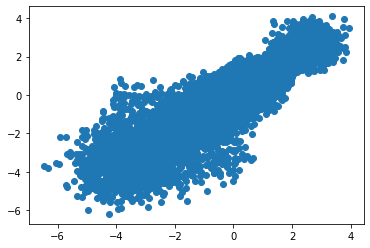

In [ ]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1= features3
data2= features4
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [ ]:
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50 , perplexity=30,  verbose=1)
#features= m.fit_transform(df_numeric)

tsne_train = m.fit_transform(features) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8712 samples in 0.966s...
[t-SNE] Computed neighbors for 8712 samples in 138.660s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8712
[t-SNE] Computed conditional probabilities for sample 2000 / 8712
[t-SNE] Computed conditional probabilities for sample 3000 / 8712
[t-SNE] Computed conditional probabilities for sample 4000 / 8712
[t-SNE] Computed conditional probabilities for sample 5000 / 8712
[t-SNE] Computed conditional probabilities for sample 6000 / 8712
[t-SNE] Computed conditional probabilities for sample 7000 / 8712
[t-SNE] Computed conditional probabilities for sample 8000 / 8712
[t-SNE] Computed conditional probabilities for sample 8712 / 8712
[t-SNE] Mean sigma: 1.410274
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.063347
[t-SNE] KL divergence after 1000 iterations: 2.498612


In [ ]:
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50,  verbose=1)
#features= m.fit_transform(df_numeric)

tsne_em = m.fit_transform(test_features) 


from bioinfokit.visuz import cluster
#cluster.tsneplot(score=tsne_em)
cluster.tsneplot(score=tsne_em)
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()

In [55]:
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster
m=TSNE(learning_rate=50, verbose=1)
tsne_em = m.fit_transform(train_features) 
cluster.tsneplot(score=tsne_em)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15200 samples in 1.735s...
[t-SNE] Computed neighbors for 15200 samples in 358.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15200
[t-SNE] Computed conditional probabilities for sample 2000 / 15200
[t-SNE] Computed conditional probabilities for sample 3000 / 15200
[t-SNE] Computed conditional probabilities for sample 4000 / 15200
[t-SNE] Computed conditional probabilities for sample 5000 / 15200
[t-SNE] Computed conditional probabilities for sample 6000 / 15200
[t-SNE] Computed conditional probabilities for sample 7000 / 15200
[t-SNE] Computed conditional probabilities for sample 8000 / 15200
[t-SNE] Computed conditional probabilities for sample 9000 / 15200
[t-SNE] Computed conditional probabilities for sample 10000 / 15200
[t-SNE] Computed conditional probabilities for sample 11000 / 15200
[t-SNE] Computed conditional probabilities for sample 12000 / 15200
[t-SNE] Computed conditional probabilities for s

In [57]:
color_class = train_labels.to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, colordot=( '#B0413E','#4381C1'), legendpos='upper right' )

In [ ]:
train_features

array([[-0.5893915 , -0.37842947,  0.2480471 , ..., -0.70812   ,
         0.5106978 ,  0.5359587 ],
       [-1.0844721 , -0.27785385, -0.5645715 , ..., -1.1021416 ,
         0.18319096,  0.56342137],
       [-1.507599  , -0.26869115, -0.5008892 , ..., -0.9228428 ,
         0.0713805 ,  0.63753456],
       ...,
       [-0.26079848, -0.04462294, -0.08351172, ..., -0.7957429 ,
         0.382503  ,  0.5617432 ],
       [-0.53201354,  0.02557845, -0.12477157, ..., -0.99282795,
         0.1700637 ,  0.64021075],
       [-0.90918595, -0.7125028 , -0.08294608, ..., -0.93787235,
         0.37896106,  0.5667769 ]], dtype=float32)

hold out 

In [52]:
train_features = features[0:15200]
train_labels = labels[0:15200]
test_features = features[15200:]
test_labels = labels[15200:]

In [52]:
train_features = features[0:14800]
train_labels = labels[0:14800]
test_features = features[14800:]
test_labels = labels[14800:]

In [ ]:
test_features.shape

(3700, 768)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels,test_size=0.2,random_state=42)

#**LogisticRegression Optimized**

---



In [ ]:
#n_splits=2
#cross_val_score=5
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5)
grid_search.fit(train_features, train_labels)
print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 5.263252631578947}
best scrores:  0.9099342105263158


In [61]:
#n_splits=2
#cross_val_score=5
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5)
grid_search.fit(train_features, train_labels)
print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 21.05271052631579}
best scrores:  0.9279729729729729


In [62]:
lr_clf = LogisticRegression(C=21.05)
lr_clf.fit(train_features, train_labels)


LogisticRegression(C=21.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
lr_clf.score(test_features, test_labels)

0.9332432432432433

In [64]:
y_predLr = lr_clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_predLr

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_predLr))
print(confusion_matrix(test_labels, y_predLr))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2997
           1       0.76      0.95      0.84       703

    accuracy                           0.93      3700
   macro avg       0.87      0.94      0.90      3700
weighted avg       0.94      0.93      0.94      3700

[[2786  211]
 [  36  667]]


In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_predLr))

0.9332432432432433


In [ ]:
scores = cross_val_score(lr_clf, features, labels,cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.888 (std: 0.008)



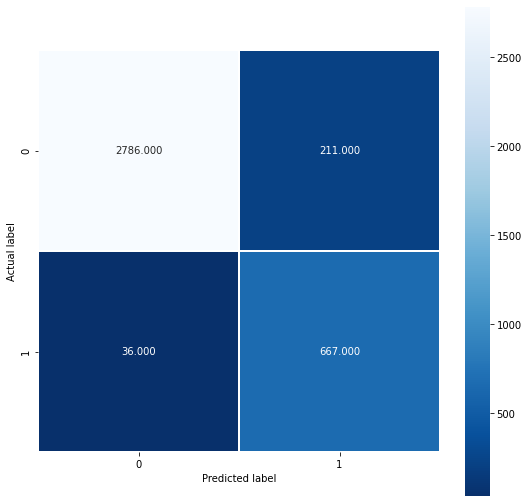

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
cm=confusion_matrix(test_labels,y_predLr)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#**Decision tree**

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth = 500, random_state = 0,criterion='gini')

In [69]:
clf = DecisionTreeClassifier(max_depth = 500, random_state = 0)

In [70]:
clf.fit(train_features, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=500, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [71]:
y_preddt = clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_preddt

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_preddt))
print(confusion_matrix(test_labels, y_preddt))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2997
           1       0.60      0.90      0.72       703

    accuracy                           0.87      3700
   macro avg       0.78      0.88      0.81      3700
weighted avg       0.90      0.87      0.87      3700

[[2571  426]
 [  72  631]]


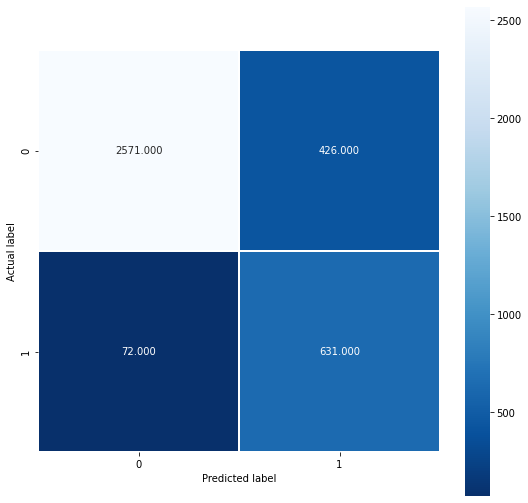

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
cm=confusion_matrix(test_labels,y_preddt)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [74]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_preddt))

0.8654054054054054


In [ ]:
# The score method returns the accuracy of the model
score = clf.score(test_features, test_labels)
print(score)

0.5765


In [ ]:
scores = cross_val_score(clf, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.814 (std: 0.005)



#**SVM**

In [75]:
from sklearn.svm import SVC

In [76]:

svclassifier = SVC(kernel='linear')
svclassifier.fit(train_features, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
y_pred = svclassifier.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Kernel : Sigmoid: 0.88 / Linear: 0.92/ rbf:0.9 / poly : 0.9

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_labels,y_pred))
print(classification_report(test_labels,y_pred))

[[2773  224]
 [  34  669]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2997
           1       0.75      0.95      0.84       703

    accuracy                           0.93      3700
   macro avg       0.87      0.94      0.90      3700
weighted avg       0.94      0.93      0.93      3700



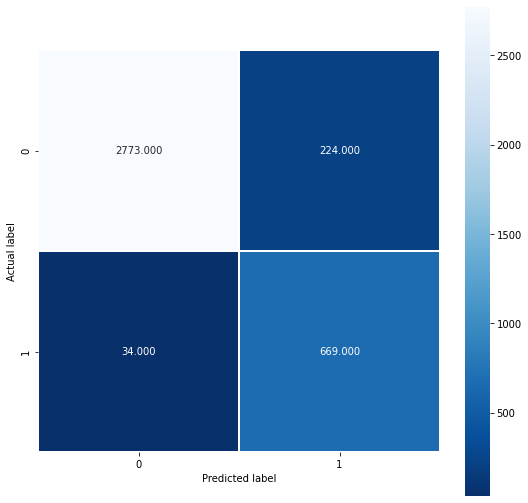

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
cm=confusion_matrix(test_labels,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred))

0.9302702702702703


In [ ]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [ ]:
grid.fit(train_features,train_labels)

In [ ]:
grid.best_params_

In [ ]:
predic = grid.predict(test_features)

In [ ]:
print(classification_report(test_labels,predic))
print(confusion_matrix(test_labels, predic))

#Cross_Val

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear')

In [ ]:
scores = cross_val_score(svclassifier,features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.885 (std: 0.006)



#**MLP Best params**

In [81]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
from sklearn.datasets import make_classification

In [82]:
parameter_space = {
    'hidden_layer_sizes': [(50,100,50), (50,10,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [83]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(train_features, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [84]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [85]:


# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


0.928 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.921 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.928 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.919 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.927 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 10, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.921 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 10, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.929 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 10, 50), 'learning_rate': 'adaptive', 'solver':

In [86]:
import time
start = time.time()

y_true, y_pred = test_labels , clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
tsne_em

In [87]:


from sklearn.metrics import classification_report, confusion_matrix
print('Results on the test set:')
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2997
           1       0.79      0.94      0.86       703

    accuracy                           0.94      3700
   macro avg       0.89      0.94      0.91      3700
weighted avg       0.95      0.94      0.94      3700

[[2818  179]
 [  40  663]]


In [ ]:
history = mlp.fit(train_features, train_labels)

plt.plot(history.history['loss'])
#plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

NameError: ignored

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoch:  85
epoch:  86
epoch:  87
epoch:  88
epoch:  89
epoch:  90
epoch:  9

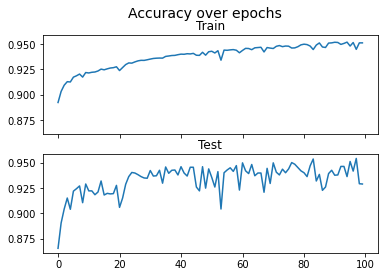

In [91]:
import matplotlib.pyplot as plt
mlp = MLPClassifier(hidden_layer_sizes=(50, 100, 50), max_iter=100, alpha=0.0001,
                    solver='sgd', verbose=0, tol=0.0001, random_state=1,
                    learning_rate_init=0.001)

""" Home-made mini-batch learning
    -> not to be used in out-of-core setting!
"""
N_TRAIN_SAMPLES = train_features.shape[0]
N_EPOCHS = 100
N_BATCH = 128
N_CLASSES = np.unique(train_labels)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(train_features.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(train_features[indices], train_labels[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(mlp.score(train_features, train_labels))

    # SCORE TEST
    scores_test.append(mlp.score(test_features, test_labels))

    epoch += 1

""" Plot """
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

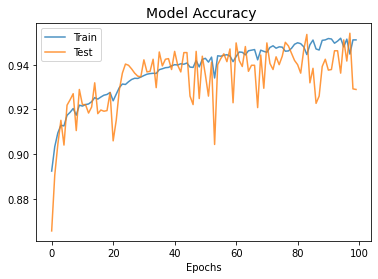

In [92]:
plt.plot(scores_train, alpha=0.8, label='Train')
plt.plot(scores_test,  alpha=0.8, label='Test')
plt.title("Model Accuracy ", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

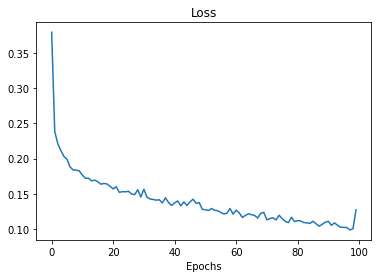

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=100)
clf.fit(train_features,train_labels)
#plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Loss" )
plt.plot(clf.loss_curve_)
plt.show()

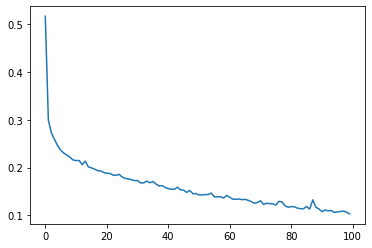

In [ ]:
import matplotlib.pyplot as plt
loss_values = clf.loss_curve_
plt.plot(loss_values)
plt.show()

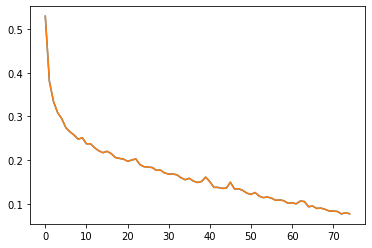

In [ ]:
    mlp=MLPClassifier(
        activation="relu",
        max_iter=100, 
        validation_fraction=0.2, 
        early_stopping=True)
    mlp.fit(train_features,train_labels)
    #print (mlp.score(X_train,y_train))
    plt.plot(mlp.loss_curve_)
    mlp.score(test_features, test_labels)
    plt.plot(mlp.loss_curve_)

AttributeError: ignored

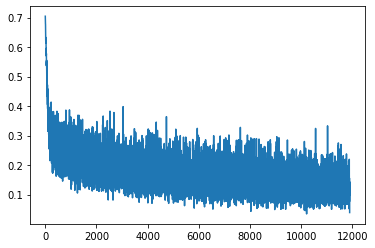

In [ ]:
plt.plot(mlp.loss_curve_,label="train")
plt.plot(mlp.validation_scores_,label="test")   #line changed
plt.legend()

In [ ]:
history= mlp=MLPClassifier(
        activation="relu",
        max_iter=100, 
        validation_fraction=0.2, 
        early_stopping=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: ignored

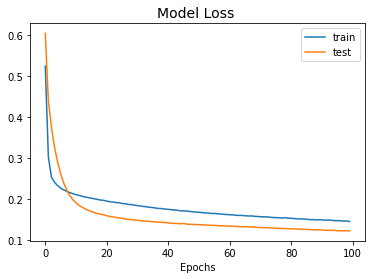

In [93]:
  import matplotlib.pyplot as plt
  mlp.fit(train_features,train_labels)
  #mlp.partial_fit(test_features,test_labels)
  #print (mlp.score(train_features,train_labels))
  #print (mlp.score(test_features,test_labels))

  plt.plot(mlp.loss_curve_, label="train")
  mlp.fit(test_features,test_labels)
  plt.title("Model Loss ", fontsize=14)
  plt.xlabel('Epochs')
  plt.legend(loc='upper right')
  plt.plot(mlp.loss_curve_, label="test")
  plt.legend()

In [ ]:
from matplotlib import pyplot as pyplot

loss_values = mlp.loss_curve_
pyplot.title('Loss / Mean Squared Error')
#mlp.history['val_loss']
pyplot.plot(loss_values)
pyplot.show()
#pyplot.plot(history['loss'], label='train')
pyplot.plot(['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from matplotlib import pyplot as pyplot
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
mlp.history['val_loss']
pyplot.plot(loss_values)
pyplot.show()
pyplot.plot(history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 680.0419142246246


In [ ]:
y_pred = clf.predict(test_features)
indices = [i for i,v in enumerate(y_pred) if y_pred[i]!=y_true[i]]
subset_of_wrongly_predicted = [test_features[i] for i in indices ]

KeyError: ignored

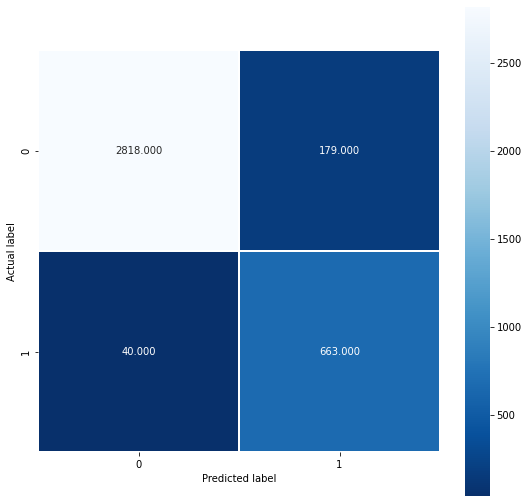

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [ ]:
y_true, y_pred = test_labels , clf.predict(test_features)


In [ ]:
import operator
for test_input ,pred, label in zip(test_features, y_pred, test_labels):
  if pred != label:
    print(test_input, 'has been classified as' , y_pred, 'should be', y_true)
    

In [95]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.9408108108108109


In [ ]:
clf.score(test_features, test_labels)

0.8694046654057462

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(clf, test_labels, y_pred, cv=5)

In [ ]:

scores = cross_val_score(clf, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.892 (std: 0.006)



#**Random Forest**

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(train_features, train_labels)
y_pred1 = rf.predict(test_features)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred1))
print(confusion_matrix(test_labels, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2997
           1       0.75      0.91      0.82       703

    accuracy                           0.92      3700
   macro avg       0.86      0.92      0.89      3700
weighted avg       0.93      0.92      0.93      3700

[[2785  212]
 [  66  637]]


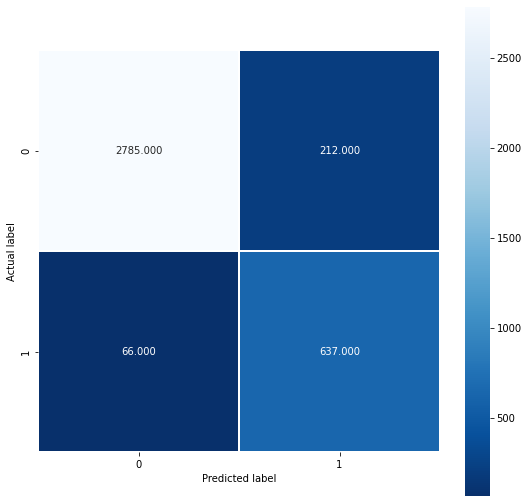

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
cm=confusion_matrix(test_labels,y_pred1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [99]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred1))

0.9248648648648649


In [ ]:
scores = cross_val_score(rf, features, labels, cv=5)

In [ ]:
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.867 (std: 0.013)



In [ ]:
scores = cross_val_score(rf, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.872 (std: 0.012)



#**Naive Bayes**

#Gaussian

In [100]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_features, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
y_pred = gnb.predict(test_features)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [102]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.8708108108108108


In [103]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred))
print(confusion_matrix(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      2997
           1       0.61      0.92      0.73       703

    accuracy                           0.87      3700
   macro avg       0.79      0.89      0.82      3700
weighted avg       0.91      0.87      0.88      3700

[[2577  420]
 [  58  645]]


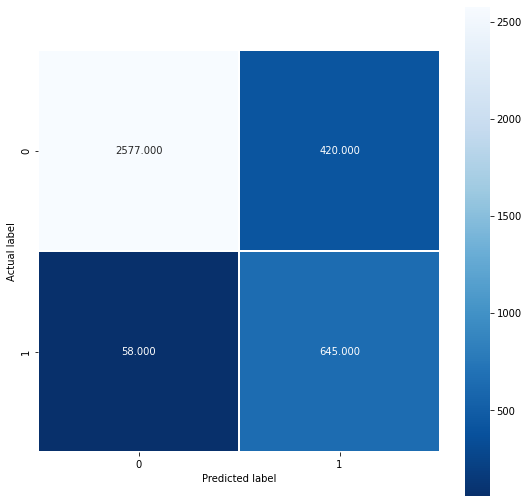

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
cm=confusion_matrix(test_labels,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

*Cross Validation*

In [ ]:
scores = cross_val_score(gnb, test_labels, y_pred, cv=5)

In [ ]:

scores = cross_val_score(gnb, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.817 (std: 0.005)



#**Optimized SVC**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(train_features, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
prediction = model.predict(test_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,prediction))
print(confusion_matrix(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1559
           1       0.94      0.83      0.88       913

    accuracy                           0.92      2472
   macro avg       0.92      0.90      0.91      2472
weighted avg       0.92      0.92      0.92      2472

[[1513   46]
 [ 159  754]]


In [ ]:
param_grid = {'C':[1,10],'gamma':[1,0.1], 'kernel':['linear','rbf']}


In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [ ]:
grid.fit(train_features,train_labels)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, gamma=1, kernel=linear, total=  32.9s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.9s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total=  33.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=  33.8s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=  33.6s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=  32.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total= 2.4min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total= 2.4min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total= 2.4min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 66.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
grid.param_grid

{'C': [1, 10], 'gamma': [1, 0.1], 'kernel': ['linear', 'rbf']}

In [ ]:
predic = grid.predict(test_features)

In [ ]:
print(classification_report(test_labels,predic))
print(confusion_matrix(test_labels, predic))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1559
           1       0.95      0.81      0.88       913

    accuracy                           0.92      2472
   macro avg       0.93      0.89      0.91      2472
weighted avg       0.92      0.92      0.91      2472

[[1524   35]
 [ 175  738]]


#**Random Forest Optimized**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_features, train_labels)

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:

pred=rfc1.predict(test_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,pred))
print(confusion_matrix(test_labels, pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1061
           1       0.92      0.83      0.88       911

    accuracy                           0.89      1972
   macro avg       0.90      0.89      0.89      1972
weighted avg       0.89      0.89      0.89      1972

[[998  63]
 [153 758]]


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_labels,pred))

Accuracy for Random Forest on CV data:  0.8950304259634888


#**XGBoost**

In [105]:
import xgboost as xgb
modelxgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
modelxgb.fit(train_features, train_labels)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [106]:
predxgb = modelxgb.predict(test_features)
predxgb

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,predxgb))
print(confusion_matrix(test_labels, predxgb))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2997
           1       0.71      0.91      0.80       703

    accuracy                           0.91      3700
   macro avg       0.84      0.91      0.87      3700
weighted avg       0.93      0.91      0.92      3700

[[2733  264]
 [  61  642]]


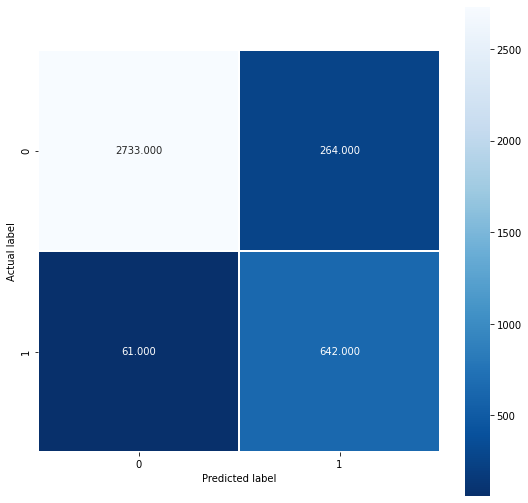

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
cm=confusion_matrix(test_labels,predxgb)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [109]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predxgb))

0.9121621621621622


In [110]:
modelxgb.score(test_features,test_labels)


0.9121621621621622

In [ ]:
scores = cross_val_score(model, test_labels, test_features, cv=5)

In [ ]:
scores = cross_val_score(modelxgb, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.863 (std: 0.015)



#**Optimized DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Same 3-step process

# 1. Instantiate
# default criterion=gini
# you can swap to criterion=entropy 
dtc = DecisionTreeClassifier(random_state=0)

# 2. Fit
dtc.fit(train_features, train_labels)

# 3. Predict, there're 4 features in the iris dataset
y_pred_class = dtc.predict(test_features)

In [ ]:
from sklearn import metrics

In [ ]:
# Accuracy
metrics.accuracy_score(test_labels, y_pred_class)

0.7873333333333333

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred_class))
print(confusion_matrix(test_labels, y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3005
           1       0.78      0.79      0.79      2995

    accuracy                           0.79      6000
   macro avg       0.79      0.79      0.79      6000
weighted avg       0.79      0.79      0.79      6000

[[2343  662]
 [ 614 2381]]


In [ ]:
# Import
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
sample_split_range = list(range(1, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)

# instantiate the grid
dtc = DecisionTreeClassifier(random_state=0)
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(train_features, train_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               1

In [ ]:

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

In [ ]:
# Entropy of child 1 = 0
# Perfect split for this child

# Entropy of child 2 = 0.918
-(2/3)*np.log2(2/3) - (1/3)*np.log2(1/3)

In [ ]:
# Weighted average of entropy(children)
(3/4)*(0.9184) + (1/4)*0

In [ ]:
# Entropy Gain
1 - (3/4)*(0.9184) + (1/4)*0

#**KNN**

In [53]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(train_features, train_labels)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_features, train_labels)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_features, test_labels) 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [54]:
knn = KNeighborsClassifier(n_neighbors=7)

In [55]:
#Fit the model
knn.fit(train_features,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [56]:
knn.score(test_features,test_labels)

0.9210810810810811

In [57]:
y_pred = knn.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels,y_pred))
from sklearn.metrics import classification_report
print(classification_report(test_labels,y_pred))

[[2754  243]
 [  49  654]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2997
           1       0.73      0.93      0.82       703

    accuracy                           0.92      3700
   macro avg       0.86      0.92      0.88      3700
weighted avg       0.93      0.92      0.92      3700



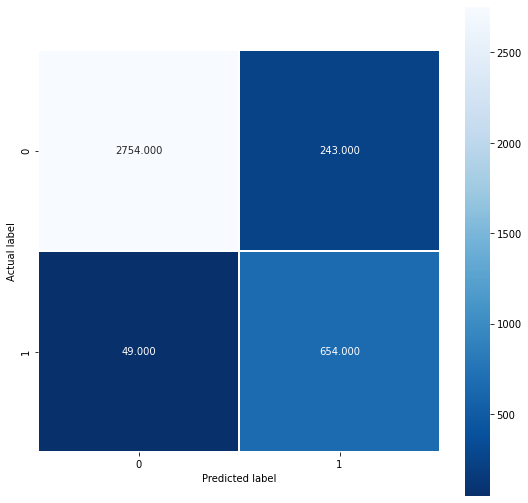

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
cm=confusion_matrix(test_labels,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred))

0.9210810810810811


In [ ]:
scores = cross_val_score(knn, test_features, test_labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )
#88%

mean: 0.910 (std: 0.010)

